# TP - ATF

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1 - Les Failles de Fourier

La transformée de Fourier est un outil pratique pour transmettre ou traiter des signaux stationnaires (dont les propriétés statistiques sont constantes dans le temps). 

Ainsi, les limites de cet outil se manifestent lors de l'étude de signaux dont leurs propriétés changent dans le temps. 

Le but de cette exercice est de mettre en évidence et d'étudier les failles de la transformée de Fourier.

### 1. Génération de Signaux

Pour étudier les failles de la transformée de Fourier, l'on a besoin de signaux à étudier. 

Ainsi, on crée une première fonction "signal" permettant de générer un signal sinusoidal à partir d'une première fréquence freq1, d'un temps de départ t1 et d'arrivée t2, puis d'une seconde fréquence freq2, d'un temps de départ t2 + 1 et d'arrivée t3.

In [2]:
def signal(freq1, freq2, t1, t2, t3) :
    s = []
    
    for i in range(t1, t2 + 1) :
        s.append(np.sin(2 * np.pi * freq1 * i))
    
    for j in range(t2 + 1, t3 + 1) :
        s.append(np.sin(2 * np.pi * freq2 * j))

    return s

On génère ensuite un premier signal "signal_1" de freq1 = 0.1, freq2 = 0.3, t1 = 0, t2 = 99, et t3 = 199, ainsi qu'un second signal "signal_2" de sens inverse, de freq1 = 0.3, freq2 = 0.1, t1 = 0, t2 = 99 et t3 = 199.

In [3]:
signal_1 = np.array(signal(0.1, 0.3, 0, 99, 199))
signal_2 = np.array(signal(0.3, 0.1, 0, 99, 199))

signal_1.shape, signal_1.dtype

((200,), dtype('float64'))

On affiche enfin nos signaux pour s'assurer de leur vraisemblance.

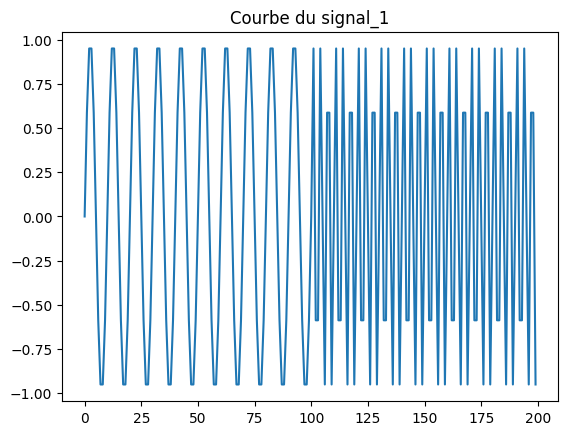

In [4]:
plt.plot(signal_1)
plt.title("Courbe du signal_1")
plt.show()

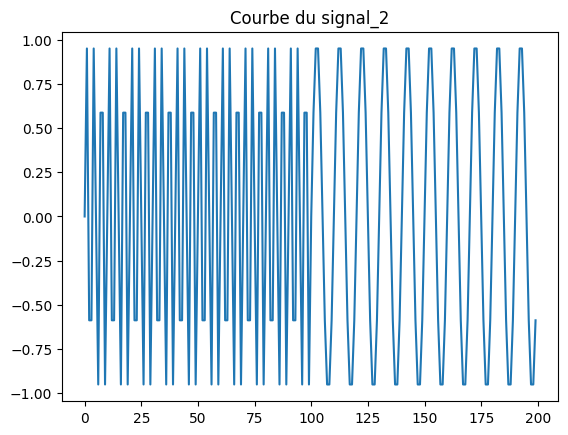

In [5]:
plt.plot(signal_2)
plt.title("Courbe du signal_2")
plt.show()

Nos signaux semblent bien sinusoïdaux, et le "signal_2" semble bien être de sens inversé au "signal_1".

### 2. Transformées de Fourier et Déduction des Modules et Phases

Une fois nos signaux générées, nous pouvons effectuer une transformée de Fourier sur ceux-ci pour déduire leurs modules et leurs phases.

Nous avons utilisé la fonction "fft" du module "numpy.fft". Celui-ci fournit une fonction qualitative et optimisée pour effectuer une transformée de Fourier discrète.

In [6]:
fft_signal_1 = np.fft.fft(signal_1)
fft_signal_2 = np.fft.fft(signal_2)

fft_signal_1.shape, fft_signal_1.dtype

((200,), dtype('complex128'))

Une fois la transformée de Fourier effectuée sur les signaux "signal_1" et "signal_2", nous pouvons obtenir leur spectre (ou module) et leur phase.

In [7]:
# Nous pouvons calculer le module en utilisant "np.abs" car la valeur absolue d'un nombre complexe correspond à sa norme euclidienne, soit le module.
# Nous pouvons aussi calculer la phase en utilisant "np.angle" car elle retourne l'angle d'un nombre complexe, soit la phase.

module_1 = np.abs(fft_signal_1)
phase_1 = np.angle(fft_signal_1)

module_2 = np.abs(fft_signal_2)
phase_2 = np.angle(fft_signal_2)

module_1.shape, module_1.dtype, phase_1.shape, phase_1.dtype

((200,), dtype('float64'), (200,), dtype('float64'))

### 3. Observation des Modules et Phases

Une fois les modules et phases déduites des transformées de Fourier de nos signaux, nous pouvons les afficher pour les observer.

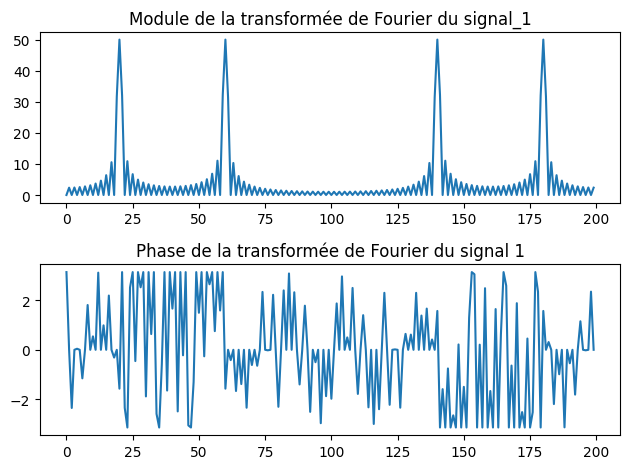

In [8]:
plt.subplot(2, 1, 1)
plt.plot(module_1)
plt.title('Module de la transformée de Fourier du signal_1')

plt.subplot(2, 1, 2)
plt.plot(phase_1)
plt.title('Phase de la transformée de Fourier du signal 1')

plt.tight_layout()

plt.show()

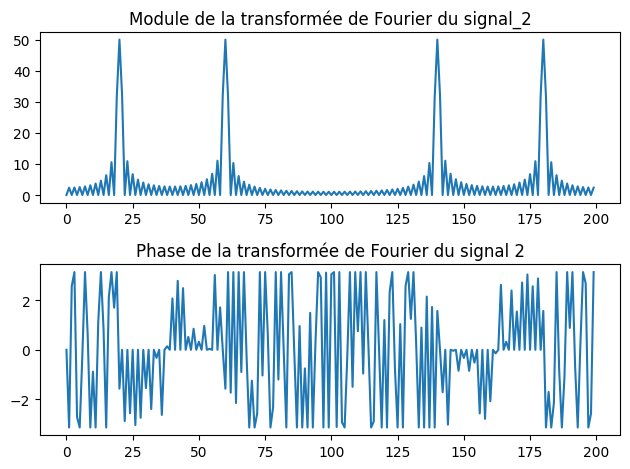

In [9]:
plt.subplot(2, 1, 1)
plt.plot(module_2)
plt.title('Module de la transformée de Fourier du signal_2')

plt.subplot(2, 1, 2)
plt.plot(phase_2)
plt.title('Phase de la transformée de Fourier du signal 2')

plt.tight_layout()

plt.show()

On observe alors que les modules des transformées des signaux sont quasiment identiques, mais les phases sont différentes.

### 4. Différenciation des Signaux basée sur les Transformées de Fourier

Si l'on ne dispose que des transformées de Fourier, on ne peut pas se baser sur les modules, ou spectres, des transformées pour discerner l'inversion des signaux ; les modules des transformées sont identitiques (ils possèdent les mêmes piques).

Néanmoins, on peut se baser sur la phase des transformées, étant différente entre les deux signaux.

Ainsi, si l'on ne dispose que de la transformée de Fourier, on peut utiliser la phase des transformées pour discerner l'inversion des signaux.

### 5. Reconstruction du Signal

Finalement, nous pouvons nous poser une dernière question : Que se passe-t-il si l'on construit le signal temporel dont le module est celui du premier signal et dont la phase est celui du second signal ?

Les modules des transformées des deux signaux étant quasiment identiques, on peut approximer le module de la transformée du premier signal à celui du second. Cela revient à reconstruire le second signal "signal_2".

Pour effectuer la reconstruction de "signal_2", nous pouvons appliquer la réciproque de la transformée de Fourier sur sa transformée. 

Pour ceci, nous avons utilisé la fonction "ifft" du module "numpy.fft". Celui-ci fournit une fonction qualitative et optimisée pour effectuer la réciproque de la transformée de Fourier discrète.

In [10]:
recons_signal_2 = np.fft.ifft(fft_signal_2)

recons_signal_2.shape, recons_signal_2.dtype

((200,), dtype('complex128'))

Nous obtenons un signal complexe. Cela est cohérent avec le fonctionnement de la fonction "ifft".

En effet, quand l'on effectue l'inverse de la transformée de Fourier d'un signal, on multiplie chaque terme du signal transformé par une fonction exponentielle complexe et on intègre sur l'ensemble du signal transformé. Cela nous donne bien un signal complexe, même si le signal d'origine est réel.

![Formule de la réciproque de la transformée de Fourier](./reciproque_fourier.png)

Pour obtenir un signal réel cohérent avec le "signal_2" originellement créé, nous pouvons simplement extraire sa partie réelle.

Nous pouvons enfin afficher le "signal_2" et sa reconstruction pour les comparer.

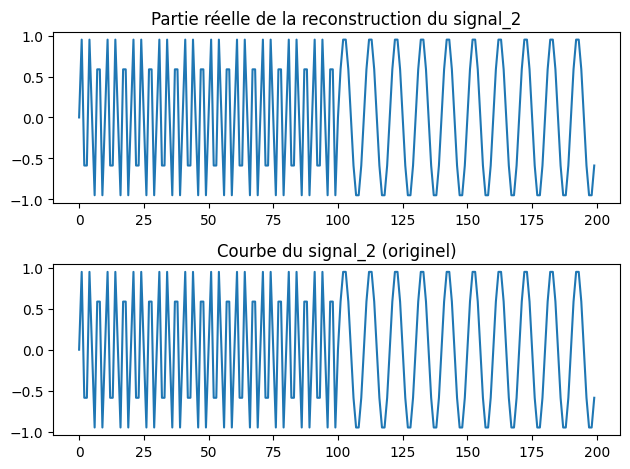

In [11]:
plt.subplot(2, 1, 1)
plt.plot(np.real(recons_signal_2))
plt.title('Partie réelle de la reconstruction du signal_2')

plt.subplot(2, 1, 2)
plt.plot(signal_2)
plt.title('Courbe du signal_2 (originel)')

plt.tight_layout()

plt.show()

Nous remarquons que les deux signaux sont identiques, la reconstruction est un succès.

## Exercice 2 - Séparation Temporelle des Fréquences

Les limites des transformées de Fourier sont atteintes lorsque les signaux étudiés voient leurs propriétés changer dans le temps.

Un moyen de contourner ces limites pourraient être d'isoler les périodes temporelles qui diffèrent au sein du signal étudié. Pour se faire, un outil pratique utilisable est la fenêtre d'observation.

Le but de cet exercice est d'étuder l'outil de la fenêtre d'observation permettant la séparation temporelle des fréquences, et de vérifier si elles corrigent les limites de la série de Fourier.

### 1. Définition d'une Fenêtre

Une fenêtre en traitement du signal est une fonction permettant d'observer une partie d'un signal sur un temps limité. Elle est notamment utile lors de l'étude locale de signaux infinis dans le temps.

La fonction fenêtre est multipliée à la fonction du signal, retournant généralement une valeur nulle en dehors de l'intervalle d'observation, et des valeurs propres au signal (modifées ou non) à l'intérieur de l'intervalle.

Nous pouvons prendre en exemple la fenêtre de Hamming, couramment utilisé dans l'observation de signaux sur un temps limité :

![Fonction fenêtre de Hamming](./hamming_window.png)

### 2. Recherche d'une Fenêtre de Hamming pour un Signal

Le signal que nous allons observer est le "signal_1" défini dans le précédent exercice. Celui-ci est composé d'une première partie à la fréquence freq1 puis d'une seconde partie à la fréquence freq2.

Notre objectif est de trouver une fenêtre de Hamming de taille adéquate pour ce signal.

La fenêtre de Hamming devra être suffisamment étroite pour ne pas couvrir trop de variations du signal, et suffisamment grande pour couvrir séparément plusieurs oscillations de la partie de la sinusoïde de fréquence freq1, et plusieurs oscillations de la partie de la sinusoïde de fréquence freq2 .

In [12]:
def Hamming_window(T, signal_size) :
    h = []

    for t in range(0, signal_size) :
        if t <= T :
            h.append(0.54 - 0.46 * np.cos(2 * np.pi * (t / T)))
        
        else :
            h.append(0)
    
    return h

Par tatonnement, nous avons trouvé qu'une fenêtre de Hamming qui remplissait les conditions précedemment citées était une définie sur l'intervalle [0, 145]. 

Nous pouvons ainsi générer la fenêtre sur le signal en multipliant ce dernier par la fonction fenêtre de Hamming définie sur [0, 145].

In [13]:
h = Hamming_window(145, len(signal_1))
h = np.array(h)

sh_1 = signal_1 * h

sh_1.shape, sh_1.dtype

((200,), dtype('float64'))

Nous pouvons enfin l'afficher pour confirmer nos conclusions.

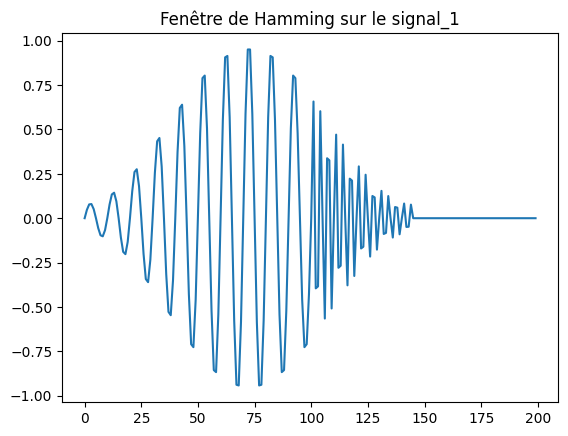

In [14]:
plt.plot(sh_1)
plt.title("Fenêtre de Hamming sur le signal_1")
plt.show()

La courbe de la fenêtre de Hamming sur le "signal_1" affichée montre bien qu'elle est suffisamment étroite, tout en comprenant les oscillations de la sinusoïde de fréquence freq1 et de fréquence freq2. Une taille de fenêtre adéquate serait donc T = 145 pour notre "signal_1".

### 3. Génération d'une Fonction de Hamming Centrée

Maintenant la taille de la fenêtre trouvée, nous pouvons tenter de la centrer en un point pour affiner nos observations.

Pour cela, nous pouvons modifier notre fonction de Hamming pour qu'elle puisse générer une fenêtre de largeur voulue, sur un segment de taille voulue, et centrée en un point donné.

In [15]:
def Hamming_window_centered(T, signal_size, center) :
    h = np.zeros(signal_size)

    h_values = np.hamming(T)

    start = 0
    if center - (T // 2) > 0 :
        start = center - (T // 2)

    end = signal_size
    if center + (T // 2) <= signal_size :
        end = center + (T // 2)
    
    h[start:end] = h_values[:(end - start)]

    return h

### 4. Calcul du Produit entre le Signal et Hamming

La fonction maintenant redéfinie, nous pouvons calculer le produit ”point à point” entre le signal et la fenêtre de Hamming, tout d'abord centrée en t = 50, puis en t = 150.

In [16]:
h1 = Hamming_window_centered(145, len(signal_1), 50)
h2 = Hamming_window_centered(145, len(signal_1), 150)

sh1_1 = signal_1 * h1
sh2_1 = signal_1 * h2

sh1_1.shape, sh1_1.dtype

((200,), dtype('float64'))

Nous pouvons enfin afficher nos fenêtres de Hamming sur le "signal_1" centrées pour observer leur allure.

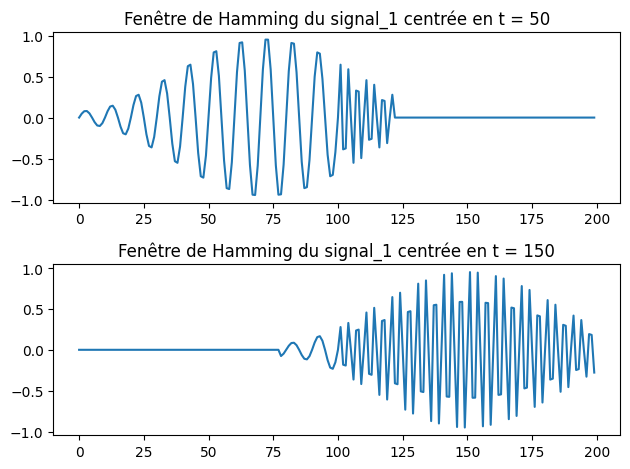

In [17]:
plt.subplot(2, 1, 1)
plt.plot(sh1_1)
plt.title('Fenêtre de Hamming du signal_1 centrée en t = 50')

plt.subplot(2, 1, 2)
plt.plot(sh2_1)
plt.title('Fenêtre de Hamming du signal_1 centrée en t = 150')

plt.tight_layout()

plt.show()

Nous pouvons déjà constater que pour la fenêtre du signal centrée en t = 50, nous observons, avec plus de détails, une plus large portion des oscillations de la sinusoïde de fréquence freq1 comparées à celle de fréquence freq2. 

Inversemment, pour la fenêtre du signal centrée en t = 150, nous observons, avec plus de détails, une plus large portion des oscillations de la sinusoïde de fréquence freq2 comparées à celle de fréquence freq1.

### 5. Transformées de Fourier du Signal et des Fenêtres

Les fenêtres maintenant obtenues, nous pouvons passer aux calculs des transformées de Fourier.

Nous allons effectuer la transformée de Fourier :
- du "signal_1" d'origine (lorsque les oscillations de fréquence freq1 et freq2 sont toutes deux conservées)
- de la fenêtre du "signal_1" à t = 50 (lorsque pratiquement seules les oscillations de fréquence freq1 sont conservées)
- de la fenêtre du "signal_2" à t = 150 (lorsque pratiqueemnt seule les oscillations de fréquence freq2 sont conservées)

Nous utiliserons pour le calcul des transformées de Fourier la fonction "fft" du module "numpy.fft", comme nous l'avons fait précédemment.

In [18]:
# Nous possédons déjà la transformée de Fourier du "signal_1" d'origine, nommé "fft_signal_1".
fft_sh1_1 = np.fft.fft(sh1_1)
fft_sh2_1 = np.fft.fft(sh2_1)

fft_sh1_1.shape, fft_sh1_1.dtype

((200,), dtype('complex128'))

### 6. Modules des Transformées de Fourier

Les transformées de Fourier maintenant calculées, nous pouvons observer et comparer leurs modules.

In [19]:
# Nous possédons déjà le module de la transformée du "signal_1" d'origine, nommé "module_1".
module_sh1 = np.abs(fft_sh1_1)
module_sh2 = np.abs(fft_sh2_1)

module_sh1.shape, module_sh1.dtype

((200,), dtype('float64'))

Une fois les modules déduites des transformées de Fourier de notre signal et de nos fenêtres, nous pouvons les afficher pour les observer.

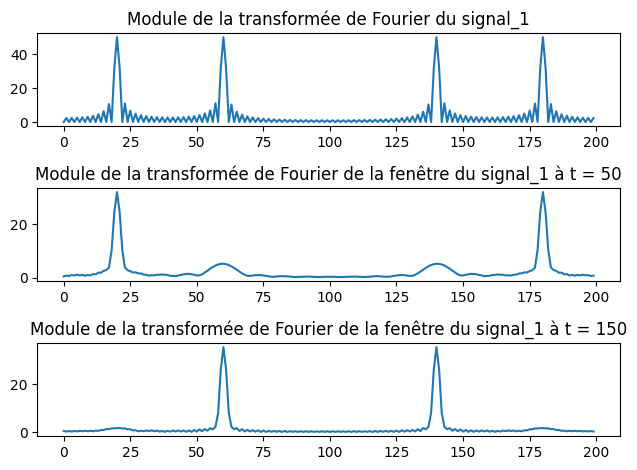

In [20]:
plt.subplot(3, 1, 1)
plt.plot(module_1)
plt.title('Module de la transformée de Fourier du signal_1')

plt.subplot(3, 1, 2)
plt.plot(module_sh1)
plt.title('Module de la transformée de Fourier de la fenêtre du signal_1 à t = 50')

plt.subplot(3, 1, 3)
plt.plot(module_sh2)
plt.title('Module de la transformée de Fourier de la fenêtre du signal_1 à t = 150')

plt.tight_layout()

plt.show()

Nous constatons que les modules des transformées de Fourier montrent des pics :
- Le module de la transformée du "signal_1" montre 4 pics, dont 2 sont positionnés côte à côte à chaque extrémité.
- Le module de la transformée de la fenêtre du "signal_1" à t = 50 montre 2 pics principaux, dont 1 est positionné à chaque extrémité.
- Le module de la transformée de la fenêtre du "signal_1" à t = 150 montre 2 pics principaux, dont 1 est positionné sur chaque côté.

Les pics des modules des transformées des fenêtres semblent avoir la même position que les pics du module de la transformée du "signal_1".

### 7. Analyse Temporelle et Fréquentielle

Les pics semblent correspondre aux fréquences des oscillations des fenêtres et du signal d'origine.

Cela est suggéré par le module du "signal_1" transformée possédant 2 pics à chaque extrémité correspondant aux 2 fréquences des oscillations de chaque partie du signal, comparé aux modules des fenêtres transformées possédant 1 pic à chaque extrémité correspondant à la seule fréquence des oscillations de la partie du signal qu'elles encadrent.

Cela est également suggéré par la position des pics des modules des fenêtres transformées. Le module à t = 50 présente des pics plus écartés que le module à t = 150. Les positions des pics des modules des fenêtres transformées correspondent également aux positions des pics du module du "signal_1" transformée.

L'importance de l'écartement entre les pics indiquerait donc la position de chaque fréquence dans le signal ; L'écartement du module à t = 50 étant le plus important, les oscillations du "signal_1" témoignent d'une première fréquence à t = 50. L'écartement du module à t = 150 étant moins important, les oscillations du "signal_1" témoignent d'une seconde fréquence à t = 150.

Nous avons donc réussi à effectuer une étude fréquentielle par l'analyse des composantes fréquentielles (pics du module de la transformée) du "signal_1", et une étude temporelle par l'analyse de l'évolution des fréquences des oscillations du "signal_1" dans le temps.

## Exercice 3 - Transformée de Fourier Fenêtrée et Spectrogramme

Les techniques précedemment étudiées pour analyser les différences temporelles et fréquentielles entre nos signaux en usant juste de la transformée de Fourier présentent certains défauts. Ces défauts rendent l'analyse spectrale compliquée voire impossible.

Cependant, la transformée de Fourier fenêtrée et l'usage de spectrogramme qui en découlerait pourrait remédier à la situation.

### 1. Réimplémentation de la Transformée de Fourier Fenêtrée

L'application d'une fenêtre à un signal permet l'observation d'une partie du signal en la limitant dans le temps. Elle se traduit par le produit entre la fenêtre et le signal.

Ainsi, la transformée de Fourier fenêtrée se traduit par le produit scalaire (ou la correlation) entre un atome temps-fréquence et un signal.

Un atome temps-fréquence est une fenêtre modulée en fréquence (par la multiplication avec un facteur fréquentielle) et translatée en temps (en la centrant par un terme temporel).

![Transformée de Fourier fenêtrée (formule courte)](./tff_court.PNG)

<div>
<img src="./tff_long.PNG" width="500"/>
</div>

Dans la formule de la transformée de Fourier fenêtrée présentée ci-dessus, f est notre signal, et g est la fenêtre. 

On observe que la fonction résultante du produit scalaire est une fonction à deux variables, l'une par rapport au temps (mu) et l'autre par rapport à la fréquence (xi).

Pour réimplémenter la transformée de Fourier fenêtrée à partir de la formule présentée ci-dessus, nous pouvons utiliser la fonction "Hamming_window_centered" précedemment définie dans l'exercice 2, permettant d'obtenir une fenêtre de Hamming centrée par rapport à une valeur donnée.

Nous pouvons ensuite remplacer l'intégrale de -inf à +inf par une somme de valeurs de 0 à la taille de notre signal (moins 1), puisque nous travaillons avec des valeurs discrètes et finies dans le temps, commençant à t = 0.

In [21]:
def TFF(f, mu, xi) :
    T = 145 # On garde T = 145 pour la fenêtre de Hamming, par rapport à nos résultats précédents.
    signal_size = len(f)
    
    g = Hamming_window_centered(T, signal_size, mu)

    t = np.arange(signal_size)
    
    return np.sum(f * g * np.exp(- 1j * xi * t))

### 2. Calcul de la Transformée de Fourier Fenêtrée pour un Signal

Une fois la fonction de la transformée de Fourier fenêtrée (nommée "TFF") définie, nous pouvons la calculer pour un signal donné sur un intervalle de temps et de fréquence où nous pensons qu'il y ait de l'energie.

Le signal d'étude choisi est le "signal_1" défini dans l'exercice 1. L'intervalle de temps choisi est [0, 200[ puisque le "signal_1" est défini de t = 0 à t = 199. L'intervalle de fréquence choisi est [0, 0.5[ puisque nous savons que ce signal a été créé à partir de deux fréquences comprises dans cet intervalle ; freq1 = 0.1 et freq2 = 0.3.

Nous allons construire un tableau de taille (100, 200), qui facilitera l'affichage par la suite.

In [22]:
tff_signal_1 = []

i = 0

for xi in np.arange(0, 0.5, 0.005) :
    tff_signal_1.append([])
    
    for mu in range(0, 200) :
        tff_signal_1[i].append(TFF(signal_1, mu, xi * 2 * np.pi)) # Mettre la pulsation (2 * pi * freq) plutôt que la fréquence seule nous donne des résultats plus corrects.

    i += 1

tff_signal_1 = np.array(tff_signal_1)

tff_signal_1.shape, tff_signal_1.dtype

((100, 200), dtype('complex128'))

### 3. Affichage du Spectrogramme

La transformée de Fourier fenêtrée maintenant calculée, nous pouvons créer et afficher le spectrogramme du "signal_1". 

Ce dernier se définit par le carré de la valeur absolue de notre transformée de Fourier fenêtrée.

In [23]:
spectrogramme_1 = np.abs(tff_signal_1) ** 2

spectrogramme_1.shape, spectrogramme_1.dtype

((100, 200), dtype('float64'))

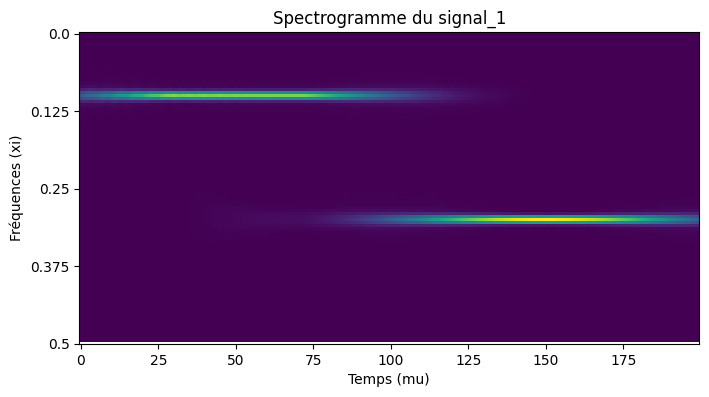

In [24]:
plt.figure(figsize=(8, 6))
plt.imshow(spectrogramme_1)
plt.title("Spectrogramme du signal_1")
plt.yticks(np.linspace(0, 100, num=5), np.linspace(0, 0.5, num=5))
plt.xlabel("Temps (mu)")
plt.ylabel("Fréquences (xi)")
plt.show()

L'image se décrit par 2 pics éclairés et espacés sur un fond sombre.

### 4. Identification des Fréquences à partir du Spectrogramme

Nous pouvons facilement identifier les fréquences que présentent les oscillations du signal sur son spectrogramme. 

L'axe des ordonnées représente la variation des fréquences sur un intervalle, l'axe des abscisses représente l'écoulement du temps sur un intervalle.

Les fréquences sont identifiées par les pics éclairés (ou d'energie) contrastant avec le fond sombre, positionnés sur une fréquence précise et s'étallant sur un temps précis.

Nous pouvons par exemple observer sur le spectrogramme du "signal_1", que les oscillations de ce signal présentent une première fréquence à 0.1 environ de t = 0 à t = 100, et une seconde fréquence à 0.3 environ de t = 100 à t = 200. Cela correspond tout à fait aux propriétés réelles du "signal_1".

### 5. Comparaison des Spectrogrammes

Nous pouvons maintenant comparer les signaux "signal_1" et "signal_2" définis dans l'exercice 1 en comparant leur spectrogramme. 

Ceci pourrait nous indiquer plus facilement les différences temporelles et fréquentielles majeures entre les deux signaux.

In [25]:
tff_signal_2 = []

i = 0

for xi in np.arange(0, 0.5, 0.005) :
    tff_signal_2.append([])
    
    for mu in range(0, 200) :
        tff_signal_2[i].append(TFF(signal_2, mu, xi * 2 * np.pi)) # Mettre la pulsation (2 * pi * freq) plutôt que la fréquence seule nous donne des résultats plus corrects.

    i += 1

tff_signal_2 = np.array(tff_signal_2)

tff_signal_2.shape, tff_signal_2.dtype

((100, 200), dtype('complex128'))

In [26]:
spectrogramme_2 = np.abs(tff_signal_2) ** 2

spectrogramme_2.shape, spectrogramme_2.dtype

((100, 200), dtype('float64'))

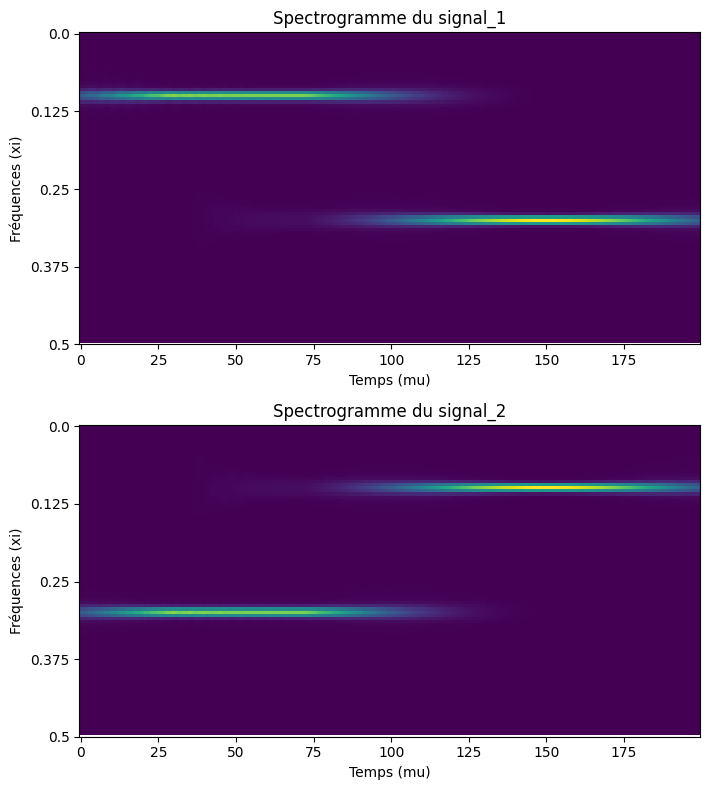

In [27]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.imshow(spectrogramme_1)
plt.title("Spectrogramme du signal_1")
plt.yticks(np.linspace(0, 100, num=5), np.linspace(0, 0.5, num=5))
plt.xlabel("Temps (mu)")
plt.ylabel("Fréquences (xi)")

plt.subplot(2, 1, 2)
plt.imshow(spectrogramme_2)
plt.title("Spectrogramme du signal_2")
plt.yticks(np.linspace(0, 100, num=5), np.linspace(0, 0.5, num=5))
plt.xlabel("Temps (mu)")
plt.ylabel("Fréquences (xi)")

plt.tight_layout()

plt.show()

Nous pouvons ainsi observer sur le spectrogramme du "signal_2", que les oscillations de ce signal présentent une première fréquence à 0.3 environ de t = 0 à t = 100, et une seconde fréquence à 0.1 environ de t = 100 à t = 200.

En comparaison, les oscillations du "signal_1" présentent ces deux fréquences avec des positions fréquentielles inversées par rapport au "signal_2", comme décrit précedemment.

Ces traits observables correspondent tout à fait aux propriétés réelles des signaux "signal_1" et "signal_2".

### 6. Efficacité du Spectrogramme

L'analyse par spectrogramme confère une description spectrale simple et directe de nos signaux en temps et en fréquence, contrastant avec les techniques précedemment utilisées qui rendaient l'analyse spectrale compliquée voire impossible.

Grâce au spectrogramme, juste à partir des transformées de Fourier, nous arrivons à distinguer les différences temporelles et fréquentielles entre nos signaux, et en pratique à savoir qui de freq1 ou de freq2 se présente en premier dans les oscillations des signaux ; freq1 puis freq2 pour "signal_1", et freq2 puis freq1 pour "signal_2", d'après leur spectrogramme respectif.

## Exercice 4 - Transformée de Fourier par Ondelette et Scalogramme

La transformée de Fourier fenêtrée (TFF), précedemment étudiée, est une technique répandue en traitement du signal, due à sa capacité de traiter efficacement des signaux en temps et en fréquence.

Une autre technique répandue en traitement du signal est la transformée de Fourier par ondelette (TFO), possédant d'autres qualités que celles de la TFF, permettant de traiter en temps, en fréquence, et à échelle, des signaux plus complexes et non stationnaires.

### 1. Génération d'un Signal Fortement Variable

On va définir une fonction permettant de générer un signal sur un intervalle de temps [0, L[ avec L = 600, suivant la définition ci-dessous :

<div>
<img src="./signal_formule.PNG" width="700"/>
</div>

In [35]:
def new_signal(L) :
    s = []
    
    for i in range(L // 3) :
        s.append(np.sign(np.sin(0.001 * (i ** 2))))
    
    for j in range(L // 3, 2 * L // 3) :
        s.append(0)

    for k in range(2 * L // 3, L) :
        s.append(np.sign(np.sin(0.0003 * ((k - 2 * L / 3) ** 2))))

    return s

On va ensuite le générer à l'aide de la fonction précédente. Nous allons nommer ce signal "signal_3".

In [36]:
signal_3 = np.array(new_signal(600))

signal_3.shape, signal_3.dtype

((600,), dtype('float64'))

On va enfin afficher le "signal_3" pour s'assurer de sa vraisemblance.

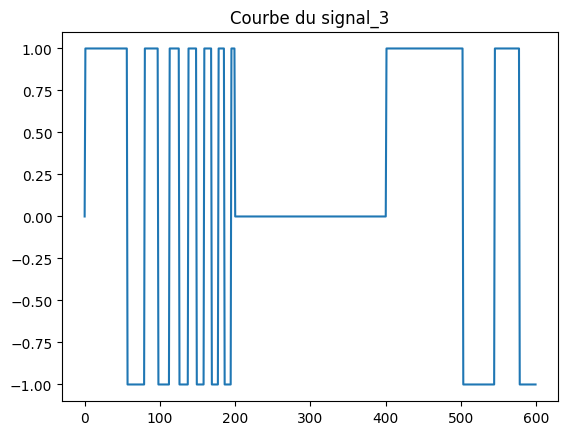

In [37]:
plt.plot(signal_3)
plt.title("Courbe du signal_3")
plt.show()

Notre signal varie effectivement très fortement dans le temps ; il est bien non stationnaire en plus de présenter des discontinuités.

### 2. Génération d'une Ondelette Mère Centrée de Haar

Pour étudier notre signal, nous pouvons utiliser une ondelette.

Une ondelette est une fonction mathématiques représentant une onde de courte durée, localisée en temps et en fréquence, contrairement aux signaux signusoïdaux généralement de longue durée, non localisée en temps et pouvant présenter une multitude de fréquences.

C'est une fonction de moyenne nulle, dilatée et translatée.

Une ondelette permet de décomposer un signal en différentes composantes en temps et en fréquence, permettant son analyse précise.

Une ondelette classique utilisée en traitement du signal est l'ondelette mère (centrée) de Haar. C'est celle que nous allons utiliser pour étudier notre signal. 

Sa définition est montrée ci-dessous :
<div>
<img src="./ondelette_haar.PNG" width="400"/>
</div>

In [38]:
def Haar_wavelet(t) :
    if t < 0 and t >= -1 / 2 :
        return 1

    elif t >= 0 and t < 1 / 2 :
        return -1

    return 0

### 3. Calcul et Affichage de la Transformée de Fourier par Ondelette

Une fois l'ondelette mère (centrée) de Haar implémentée, nous pouvons utiliser la transformée de Fourier par ondelette (TFO) pour étudier notre "signal_3".

La définition de la TFO est montrée ci-dessous :
<div>
<img src="./tfo_court.PNG" width="300"/>
</div>

Elle use de la paramétrisation de l'ondelette mère de Haar pour gamma = 0.125, dont la formule est décrite ci-dessous :
<div>
<img src="./haar_paramètrisation.PNG" width="400"/>
</div>
Avec j dans N*, n et t dans l'intervalle [0, L[, où L = 600 (comme établi précedemment).

Pendant la création de notre TFO, nous allons calculer ses valeurs pour j variant dans l'intervalle [1, 32], ce qui facilitera l'affichage par la suite.

In [39]:
tfo_signal_3 = []

gamma = 0.125

L = 600

i = 0

for j in range(1, 32 + 1) :
    tfo_signal_3.append([])
    
    for n in range(0, L) :
        w = [(1 / np.sqrt(2 ** (gamma * j))) * Haar_wavelet((t - n) / (2 ** (gamma * j))) for t in range(0, L)]
        w = np.array(w)

        t = np.arange(L)
        
        tfo_value = np.sum(signal_3 * w * np.exp(- 1j * gamma * t))

        tfo_signal_3[i].append(tfo_value)

    i += 1

tfo_signal_3 = np.array(tfo_signal_3)

tfo_signal_3.shape, tfo_signal_3.dtype

((32, 600), dtype('complex128'))

La TFO présente des valeurs complexes, comme attendues d'une transformée de Fourier.

Nous pouvons néamoins afficher sa partie réelle pour observer son image 2D.

In [40]:
real_3 = np.real(tfo_signal_3)

real_3.shape, real_3.dtype

((32, 600), dtype('float64'))

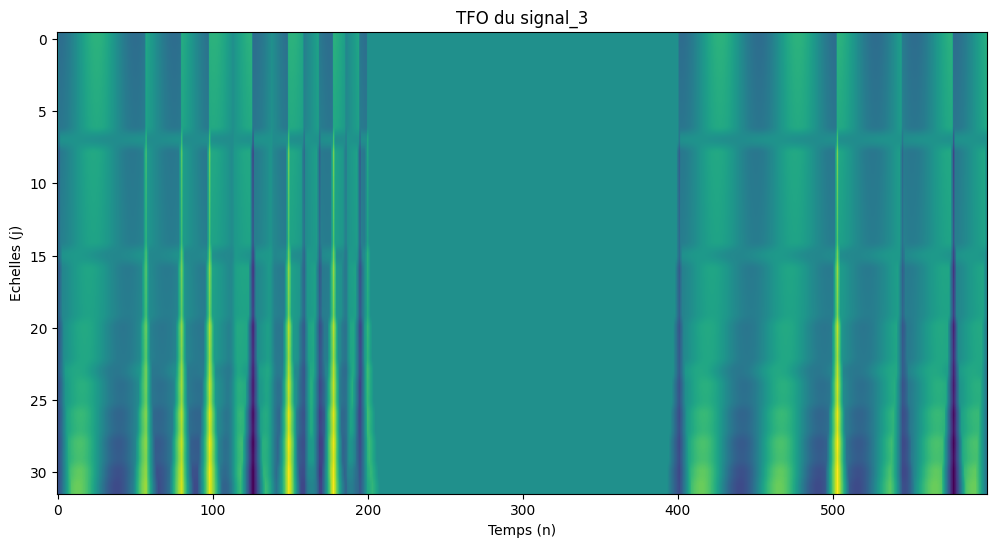

In [41]:
plt.figure(figsize=(12, 6))
plt.imshow(real_3, aspect = 'auto') 
plt.title("TFO du signal_3")
plt.xlabel("Temps (n)")
plt.ylabel("Echelles (j)")
plt.show()

On remarque l'image résultante est constituée de pics ou de "creux" éclairés ou sombres.

Ces pics et ces creux s'alternent et semblent correspondre aux variations du "signal_3".

### 4. Lien entre la Dérivée Temporelle du Signal et la TFO

Nous avons vu qu'il semblerait exister un lien entre la TFO du "signal_3" et ses variations. Ce lien peut aussi s'expliquer mathématiquement.

Soit notre "signal_3" renommé "s", découpé en 3 parties, pour tout x dans l'intervalle [0, L[, suivant sa définition rappelée ci-dessous :
<div>
<img src="./signal_formule.PNG" width="700"/>
</div>

Alors nous pouvons démontrer que pour la dérivée temporelle de la première partie du signal, nommée "s1", où s1 = sign(sin(10^-2 * x^2)) pour tout x dans [0, L / 3[, qu'elle est proportionnelle à Ts1(j, n) pour j fixé.

La démonstration est montrée ci-dessous :
<div>
<img src="./demo.png" width="2000"/>
</div>

Nous pouvons également démontrer la proportionnalité entre la dérivée temporelle de la 3ème partie du signal, nommée "s3", où s3 = sign(sin(10^-3 * (x - 2 * L / 3)^2)) pour tout x dans [2 * L / 3, L[, et Ts3(j, n) pour j fixé, en usant de la même démonstration.

La deuxième partie du signal dans l'intervalle [L / 3, 2 * L / 3[ est nulle, de même que pour sa TFO.

La dérivée temporelle de "s", ou encore du "signal_3", est donc proportionnelle et bien liée à la TFO, ou encore (Ts(j, n))n.

### 5. Affichage du Scalogramme

La transformée de Fourier par ondelette maintenant calculée, nous pouvons créer et afficher le scalogramme du "signal_3". 

Ce dernier se définit par le carré de la valeur absolue de notre transformée de Fourier par ondelette.

In [42]:
scalogramme_3 = np.abs(tfo_signal_3) ** 2

scalogramme_3.shape, scalogramme_3.dtype

((32, 600), dtype('float64'))

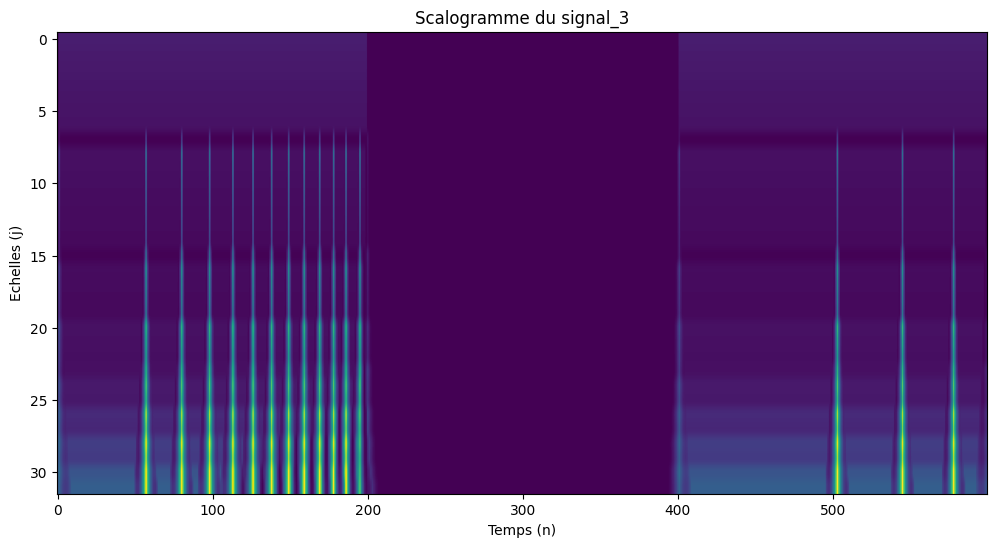

In [43]:
plt.figure(figsize=(12, 6))
plt.imshow(scalogramme_3, aspect = 'auto') 
plt.title("Scalogramme du signal_3")
plt.xlabel("Temps (n)")
plt.ylabel("Echelles (j)")
plt.show()

On remarque sur le scalogramme affiché que nous pouvons effectivement suivre les discontinuités du "signal_3" dans le temps, au travers des pics éclairés, ou d'intensité, contrastant avec le reste du fond plus sombre.

### 6. Augmentation de l'Echelle et Affichage du Scalogramme

Nous pouvons maintenant augmenter la valeur maximale de l'échelle (j) à 73.

Ceci nous permettra d'observer des différences au niveau de l'étalement des coefficients des grandes pentes.

In [50]:
ver2_tfo_signal_3 = []

gamma = 0.125

L = 600

i = 0

for j in range(1, 73 + 1) :
    ver2_tfo_signal_3.append([])
    
    for n in range(0, L) :
        w = [(1 / np.sqrt(2 ** (gamma * j))) * Haar_wavelet((t - n) / (2 ** (gamma * j))) for t in range(0, L)]
        w = np.array(w)

        t = np.arange(L)
        
        tfo_value = np.sum(signal_3 * w * np.exp(- 1j * gamma * t))

        ver2_tfo_signal_3[i].append(tfo_value)

    i += 1

ver2_tfo_signal_3 = np.array(ver2_tfo_signal_3)

ver2_tfo_signal_3.shape, ver2_tfo_signal_3.dtype

((73, 600), dtype('complex128'))

In [51]:
ver2_scalogramme_3 = np.abs(ver2_tfo_signal_3) ** 2

ver2_scalogramme_3.shape, ver2_scalogramme_3.dtype

((73, 600), dtype('float64'))

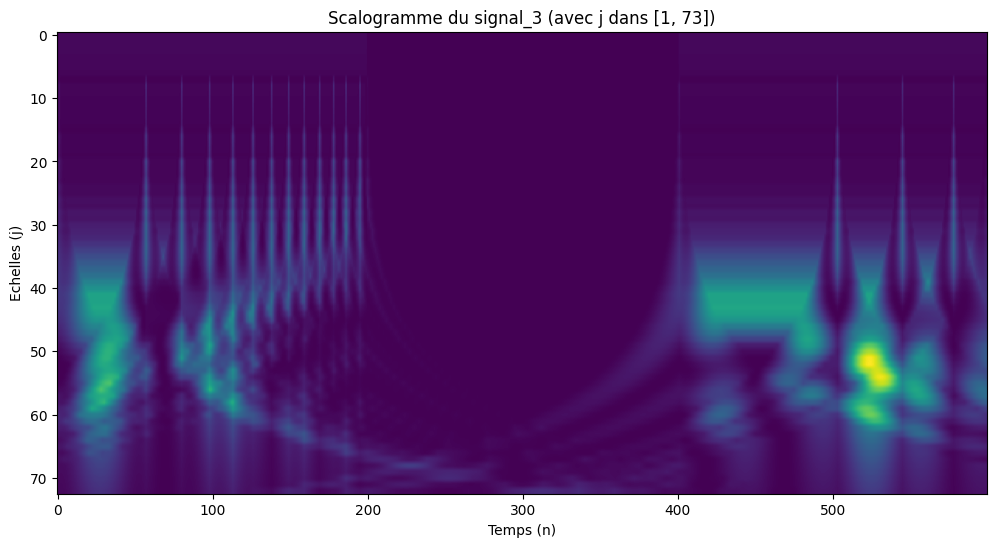

In [52]:
plt.figure(figsize=(12, 6))
plt.imshow(ver2_scalogramme_3, aspect = 'auto') 
plt.title("Scalogramme du signal_3 (avec j dans [1, 73])")
plt.xlabel("Temps (n)")
plt.ylabel("Echelles (j)")
plt.show()

Ainsi, nous remarquons qu'au fur et à mesure que l'échelle croit, l'étalement des coefficients des grandes pentes semblent se croiser et se confondre.

Elle finissent par rentrer en "conflit", et perdre en précision.

### 7. Tendance et Scalogramme à Grande Echelle

Nous remarquons également que plus les grandes pentes du signal sont resserés dans le temps, plus elle rentrent rapidement en "conflit", et perdent ainsi en précision et en visibilité.

Lire des coefficients sur plusieurs échelles est alors crucial pour éviter de potentiels soucis de précision en lisant le scalogramme.

### 8. Recherche Visuelle des Maxima Locaux et Déduction du Nombre de Pentes

Visuellement, pour une échelle fixée, nous pouvons compter 18 à 19 maxima locaux. 

Pour une echelle fixée, le nombre de pentes détectées par la TFO serait ainsi de 17 à 18. 

Nous pensons que nous obtiendrions les mêmes résultats par un algorithme de recherche des maxima locaux.

### 9. Différence d'Echelle entre les Maxima Locaux

On peut enfin observer que les maxima locaux varient en intensité en fonction de l'échelle.

Ils n'atteignent ainsi pas tous leur valeur maximale à la même échelle, et des pentes semblent être mieux détectées à certaines échelles plutôt qu'à d'autres (comme les pentes à n = 50 ou n = 450 pour j = 42, ressortant beaucoup plus que les autres pentes à la même échelle).

La raison provient de la nature de la transformée de Fourier par ondelette qui est opérée.

Lorsque l'on effectue la transformée sur le signal à l'aide d'une ondelette, on le fait à des résolutions temporelles et à des échelles différentes pour faire correspondre l'ondelette au pattern local du signal étudié ; c'est l'idée d'intercorrelation et donc de pattern matching que l'on retrouve dans la formule de la transformée.

Ainsi, les maxima locaux apparaîtront là où l'ondelette correspond le mieux à certains motifs, patterns, du signal à l'échelle étudiée, pour une résolution temporelle donnée, d'où la différence d'échelle entre les maxima locaux.